# Classification

## 1. Support Vector Machine

### A.Modeling

In [1]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix,ConfusionMatrixDisplay,roc_curve

In [2]:
data= pd.read_csv('../Data/data_preprocessed.csv', index_col=0)
data.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,7.199101,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,7.060069,129.422921,18630.057858,6.635246,344.894384,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,334.706620,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [3]:
X_cols=['ph', 'Hardness','Solids','Chloramines','Conductivity','Trihalomethanes','Organic_carbon','Sulfate','Turbidity']
Y_col=['Potability']


In [4]:
#spliting the dataset
X_train, X_test, y_train, y_test=train_test_split(data[X_cols],data[Y_col],random_state=42, test_size=0.25)

In [53]:
m=y_train.to_numpy(dtype=int)

In [54]:
m

array([[1],
       [1],
       [0],
       ...,
       [0],
       [0],
       [1]])

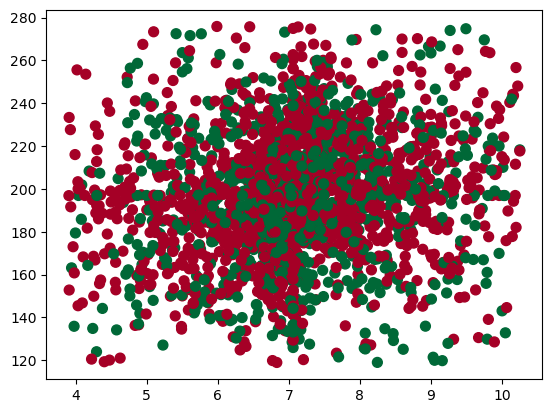

In [55]:
plt.scatter(X_train.iloc[:,0], X_train.iloc[:,1],
           marker= 'o', s=50, cmap=plt.cm.RdYlGn,c=y_train.to_numpy(dtype=int))
plt.show()

In [9]:
#hyperparameter tuning
X_train_np=np.array(X_train)
y_train_np=np.array(y_train)
params={'C':[0.1,1,10,100,1000],'kernel':['linear','rbf','poly','sigmoid'],'degree':[2,3],'gamma':[0.1,0.001,0.0001]}
scaler=StandardScaler()

X_train_scaled= scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)
    

make_gridsearch= GridSearchCV(SVC(),params,n_jobs=-1,cv=5,verbose=2)

In [10]:
make_gridsearch.fit(X_train_scaled,y_train.values.ravel())

Fitting 5 folds for each of 120 candidates, totalling 600 fits
[CV] END .............C=0.1, degree=2, gamma=0.1, kernel=rbf; total time=   0.3s
[CV] END .........C=0.1, degree=2, gamma=0.1, kernel=sigmoid; total time=   0.3s
[CV] END ..........C=0.1, degree=2, gamma=0.001, kernel=poly; total time=   0.1s
[CV] END ..........C=0.1, degree=2, gamma=0.001, kernel=poly; total time=   0.1s
[CV] END .......C=0.1, degree=2, gamma=0.0001, kernel=linear; total time=   0.1s
[CV] END ..........C=0.1, degree=2, gamma=0.0001, kernel=rbf; total time=   0.3s
[CV] END ......C=0.1, degree=2, gamma=0.0001, kernel=sigmoid; total time=   0.2s
[CV] END ..........C=0.1, degree=3, gamma=0.1, kernel=linear; total time=   0.1s
[CV] END ............C=0.1, degree=3, gamma=0.1, kernel=poly; total time=   0.2s
[CV] END ............C=0.1, degree=3, gamma=0.1, kernel=poly; total time=   0.2s
[CV] END ........C=0.1, degree=3, gamma=0.001, kernel=linear; total time=   0.1s
[CV] END ..........C=0.1, degree=3, gamma=0.00

GridSearchCV(cv=5, estimator=SVC(), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10, 100, 1000], 'degree': [2, 3],
                         'gamma': [0.1, 0.001, 0.0001],
                         'kernel': ['linear', 'rbf', 'poly', 'sigmoid']},
             verbose=2)

In [11]:

print(f"The best parameter: {make_gridsearch.best_params_}")
print(f"The best estimator: {make_gridsearch.best_estimator_}")
print(f"The best index: {make_gridsearch.best_index_}")
print(f"The best score: {make_gridsearch.best_score_}")


The best parameter: {'C': 10, 'degree': 2, 'gamma': 0.1, 'kernel': 'poly'}
The best estimator: SVC(C=10, degree=2, gamma=0.1, kernel='poly')
The best index: 50
The best score: 0.6651692988904945
[CV] END ..........C=0.1, degree=2, gamma=0.1, kernel=linear; total time=   0.1s
[CV] END ............C=0.1, degree=2, gamma=0.1, kernel=poly; total time=   0.2s
[CV] END .........C=0.1, degree=2, gamma=0.1, kernel=sigmoid; total time=   0.3s
[CV] END ...........C=0.1, degree=2, gamma=0.001, kernel=rbf; total time=   0.3s
[CV] END .......C=0.1, degree=2, gamma=0.001, kernel=sigmoid; total time=   0.2s
[CV] END .......C=0.1, degree=2, gamma=0.0001, kernel=linear; total time=   0.1s
[CV] END .........C=0.1, degree=2, gamma=0.0001, kernel=poly; total time=   0.2s
[CV] END ......C=0.1, degree=2, gamma=0.0001, kernel=sigmoid; total time=   0.2s
[CV] END .............C=0.1, degree=3, gamma=0.1, kernel=rbf; total time=   0.3s
[CV] END .........C=0.1, degree=3, gamma=0.1, kernel=sigmoid; total time=   

[CV] END ..........C=0.1, degree=2, gamma=0.1, kernel=linear; total time=   0.2s
[CV] END ............C=0.1, degree=2, gamma=0.1, kernel=poly; total time=   0.2s
[CV] END ............C=0.1, degree=2, gamma=0.1, kernel=poly; total time=   0.2s
[CV] END ........C=0.1, degree=2, gamma=0.001, kernel=linear; total time=   0.2s
[CV] END ...........C=0.1, degree=2, gamma=0.001, kernel=rbf; total time=   0.3s
[CV] END .......C=0.1, degree=2, gamma=0.0001, kernel=linear; total time=   0.2s
[CV] END ..........C=0.1, degree=2, gamma=0.0001, kernel=rbf; total time=   0.3s
[CV] END ..........C=0.1, degree=3, gamma=0.1, kernel=linear; total time=   0.2s
[CV] END .............C=0.1, degree=3, gamma=0.1, kernel=rbf; total time=   0.3s
[CV] END .........C=0.1, degree=3, gamma=0.1, kernel=sigmoid; total time=   0.3s
[CV] END ...........C=0.1, degree=3, gamma=0.001, kernel=rbf; total time=   0.3s
[CV] END .......C=0.1, degree=3, gamma=0.001, kernel=sigmoid; total time=   0.2s
[CV] END ..........C=0.1, de

[CV] END ..........C=0.1, degree=2, gamma=0.1, kernel=linear; total time=   0.1s
[CV] END .............C=0.1, degree=2, gamma=0.1, kernel=rbf; total time=   0.3s
[CV] END .........C=0.1, degree=2, gamma=0.1, kernel=sigmoid; total time=   0.3s
[CV] END ...........C=0.1, degree=2, gamma=0.001, kernel=rbf; total time=   0.3s
[CV] END .......C=0.1, degree=2, gamma=0.001, kernel=sigmoid; total time=   0.2s
[CV] END ..........C=0.1, degree=2, gamma=0.0001, kernel=rbf; total time=   0.3s
[CV] END ......C=0.1, degree=2, gamma=0.0001, kernel=sigmoid; total time=   0.2s
[CV] END ..........C=0.1, degree=3, gamma=0.1, kernel=linear; total time=   0.1s
[CV] END ............C=0.1, degree=3, gamma=0.1, kernel=poly; total time=   0.2s
[CV] END .........C=0.1, degree=3, gamma=0.1, kernel=sigmoid; total time=   0.2s
[CV] END ...........C=0.1, degree=3, gamma=0.001, kernel=rbf; total time=   0.3s
[CV] END .......C=0.1, degree=3, gamma=0.001, kernel=sigmoid; total time=   0.2s
[CV] END .......C=0.1, degre

In [19]:
#building a model with best estimator.
svc=SVC(C=10, degree=2, gamma=0.1, kernel='poly',probability=True,random_state=42)
svc.fit(X_train_scaled,y_train.values.ravel())

SVC(C=10, degree=2, gamma=0.1, kernel='poly', probability=True, random_state=42)

### B. Evaluating the model

In [27]:
#testing 
pred=svc.predict(X_test_scaled)
print("Classification Report: \n")
print(classification_report(y_test,pred))


Classification Report: 

              precision    recall  f1-score   support

           0       0.68      0.93      0.78       517
           1       0.64      0.23      0.34       294

    accuracy                           0.68       811
   macro avg       0.66      0.58      0.56       811
weighted avg       0.67      0.68      0.62       811



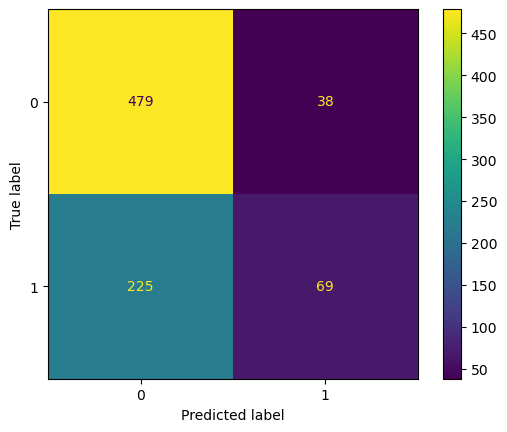

In [23]:
cm=confusion_matrix(y_test,pred)
display_cm=ConfusionMatrixDisplay(confusion_matrix=cm, display_labels= svc.classes_)
display_cm.plot()
plt.show()

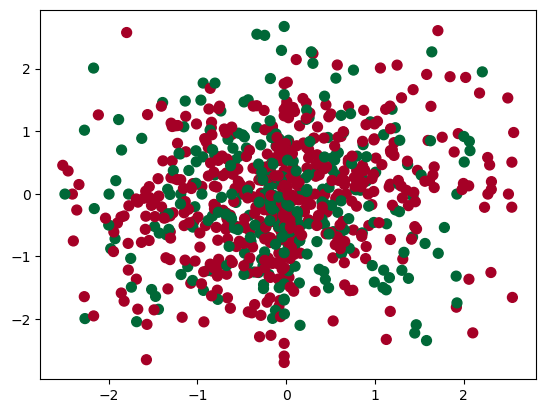

In [57]:
plt.scatter(X_test_scaled[:,0], X_test_scaled[:,1],
           marker= 'o', s=50, cmap=plt.cm.RdYlGn,c=y_test.to_numpy(dtype=int))
plt.show()

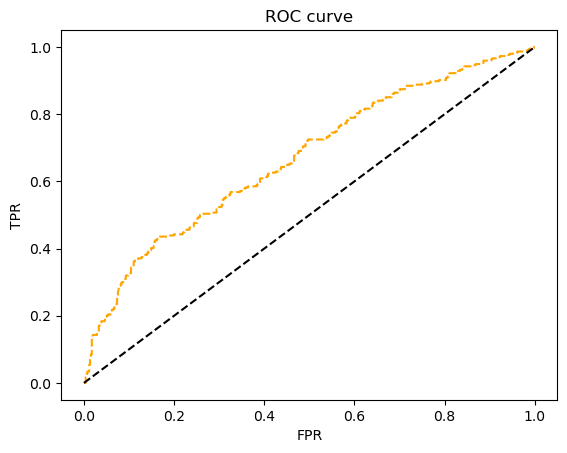

In [25]:
#plotting ROC curve
pred_proba=svc.predict_proba(X_test_scaled)
fpr,tpr,threshold=roc_curve(y_test,pred_proba[:,1], pos_label=1)
random_probs=[0 for i in range(len(y_test))]
p_fpr,p_tpr,_=roc_curve(y_test,random_probs,pos_label=1)
plt.plot(fpr,tpr,linestyle='--',color="orange",label='SVC')
plt.plot(p_fpr,p_tpr,linestyle='--',color='black')
plt.title("ROC curve")
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.show()

In [ ]:
y_predict =clf_dtc_model.predict(x_test)
print("Classification Report :-")
display(pd.DataFrame(classification_report(y_test, y_predict, output_dict=True)).transpose())
cm=confusion_matrix(y_test, y_predict, labels=clf_dtc_model.classes_)
# Model Accuracy, how often is the classifier correct?
print("Accuracy Score:",accuracy_score(y_test, y_predict))
confusionMatrixDisplay = ConfusionMatrixDisplay(confusion_matrix= cm,
                                                display_labels=clf_dtc_model.classes_)
fig, ax = plt.subplots(figsize=(3,3))
confusionMatrixDisplay.plot(ax=ax)
plt.show()

# 3. KNN Classification

In [ ]:
knn = KNeighborsClassifier()

k_range = list(range(1, 31))
param_grid = dict(n_neighbors=k_range)

# defining parameter range
grid_search_cv = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy', return_train_score=False,verbose=1)

# fitting the model for grid search
grid_search_cv.fit(x_train, y_train.values.ravel())

print(f"The best parameter: {grid_search_cv.best_params_}")
print(f"The best estimator: {grid_search_cv.best_estimator_}")
print(f"The best index: {grid_search_cv.best_index_}")
print(f"The best score: {grid_search_cv.best_score_}")

In [ ]:
clf_knn_model = KNeighborsClassifier(n_neighbors=29)
clf_knn_model.fit(x_train, y_train.values.ravel())

y_predict =clf_knn_model.predict(x_test)
print("Classification Report :-")
display(pd.DataFrame(classification_report(y_test, y_predict, output_dict=True)).transpose())
cm=confusion_matrix(y_test, y_predict, labels=clf_knn_model.classes_)

print("Accuracy Score:",accuracy_score(y_test, y_predict))
confusionMatrixDisplay = ConfusionMatrixDisplay(confusion_matrix= cm,
                                                display_labels=clf_knn_model.classes_)
fig, ax = plt.subplots(figsize=(3,3))
confusionMatrixDisplay.plot(ax=ax)
plt.show()

In [ ]:
y_score1 = clf_rfc_model.predict_proba(x_test)[:,1]
false_positive_rate1, true_positive_rate1, threshold1 = roc_curve(y_test, y_score1)

print('roc_auc_score for rfc: ', roc_auc_score(y_test, y_score1))

plt.subplots(1, figsize=(3,3))
plt.title('Random forest ROC')
plt.plot(false_positive_rate1, true_positive_rate1)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()